In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Vehicle_CO2_Emission.csv',encoding= 'unicode_escape', sep=',')

In [3]:
df.head()

,Engine Type,Cylinders,Transmission,Fuel Type,CO2 Emissions (g/km)
0,Inline 4,4,Manual,Petrol,120
1,V6,6,Automatic,Petrol,150
2,Inline 4,4,CVT,Hybrid,90
3,V8,8,Manual,Petrol,250
4,V6,6,Automatic,Diesel,180


In [4]:
df.isna().sum()

Engine Type             0
Cylinders               0
Transmission            0
Fuel Type               0
CO2 Emissions (g/km)    0
dtype: int64

/var/folders/mn/r97rfrgx549chn4x7dwcz_q80000gn/T/ipykernel_48897/1999486822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

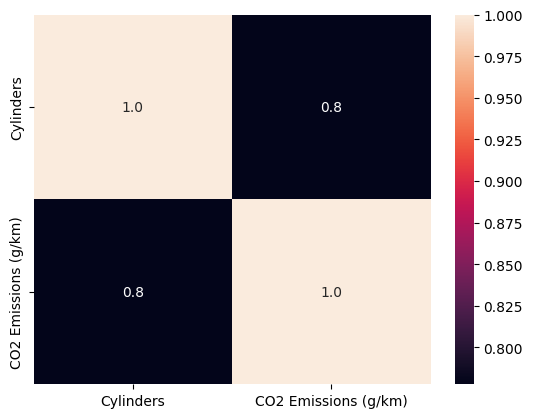

In [5]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.1f')

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder1=LabelEncoder()
df['Engine Type']=label_encoder1.fit_transform(df['Engine Type'])

label_encoder2=LabelEncoder()
df['Transmission']=label_encoder2.fit_transform(df['Transmission'])

label_encoder3=LabelEncoder()
df['Fuel Type']=label_encoder3.fit_transform(df['Fuel Type'])

In [7]:
df.head()

,Engine Type,Cylinders,Transmission,Fuel Type,CO2 Emissions (g/km)
0,0,4,2,3,120
1,1,6,0,3,150
2,0,4,1,2,90
3,2,8,2,3,250
4,1,6,0,0,180


In [8]:
le_name_mapping1 = dict(zip(label_encoder1.classes_, label_encoder1.transform(label_encoder1.classes_)))
print(le_name_mapping1)

{'Inline 4': 0, 'V6': 1, 'V8': 2}


In [11]:
le_name_mapping2 = dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))
print(le_name_mapping2)

{'Automatic': 0, 'CVT': 1, 'Manual': 2}


In [12]:
le_name_mapping3 = dict(zip(label_encoder3.classes_, label_encoder3.transform(label_encoder3.classes_)))
print(le_name_mapping3)

{'Diesel': 0, 'Electric': 1, 'Hybrid': 2, 'Petrol': 3}


In [115]:
import pickle
with open('engine_type.pickle', 'wb') as handle:
    pickle.dump(le_name_mapping1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('engine_type.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [116]:
import pickle
with open('transmission.pickle', 'wb') as handle:
    pickle.dump(le_name_mapping2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('transmission.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [117]:
import pickle
with open('fuel_type.pickle', 'wb') as handle:
    pickle.dump(le_name_mapping3, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('fuel_type.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [13]:
df.isna().sum()

Engine Type             0
Cylinders               0
Transmission            0
Fuel Type               0
CO2 Emissions (g/km)    0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X=df.drop('CO2 Emissions (g/km)',axis=1)
y=df['CO2 Emissions (g/km)']
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [15]:
!pip install xgboost

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [122]:
rf.score(X_test,y_test)

0.9040635643651933

In [123]:
pickle.dump(rf, open('vehicle_co2.pkl', 'wb'))

In [126]:
rf.predict([[1,2,1,1]])

/Users/adwaitlaxmikantbhosale/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([28.25993486])

In [17]:
y_pred=rf.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {rmse}")

MAE: 22.1902060977453
MAE: 685.1854498652939
RMSE: 26.176047254413604


<BarContainer object of 3 artists>

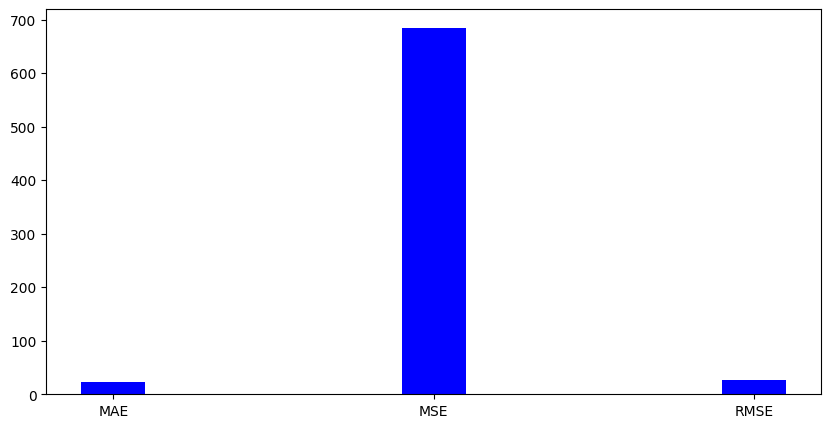

In [19]:
import matplotlib.pyplot as plt
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)

errors={"MAE": mae,
        "MSE":mse,
       "RMSE":rmse}
err=list(errors.keys())
vals=list(errors.values())

fig=plt.figure(figsize=(10,5))
plt.bar(err,vals,color='b',width=0.2)

In [130]:
def predFunc2(engine_type, cylinders, transmission, fuel_type):
    with open('engine_type.pickle', 'rb') as handle:
        b1 = pickle.load(handle)
    with open('transmission.pickle', 'rb') as handle:
        b2 = pickle.load(handle)
    with open('fuel_type.pickle', 'rb') as handle:
        b3 = pickle.load(handle)
    model=pickle.load(open('vehicle_co2.pkl', 'rb'))
    val1=b1.get(engine_type)
    val2=b2.get(transmission)
    val3=b3.get(fuel_type)
    ans=model.predict([[val1,cylinders, val2, val3]])
    return ans[0]

In [131]:
predFunc2('Inline 4', 4, 'Manual', 'Petrol')

/Users/adwaitlaxmikantbhosale/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


120.92481351981353